In [1]:


import pandas as pd
import numpy as np

import os 

import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')



In [2]:


train_path = './fruits-360/Training/'
test_path = './fruits-360/Test/'



In [3]:

#抽一张图片作为示例，送到image_shape
img = load_img(train_path + "Apple Braeburn/0_100.jpg", target_size=(128,128))



In [8]:

#固定image_shape大小
image_shape = img_to_array(img)



NameError: name 'img' is not defined

In [5]:


className = glob(train_path + '*')
print(className)
number_of_class = len(className)
print(number_of_class)



['./fruits-360/Training\\Apple Braeburn', './fruits-360/Training\\Apple Crimson Snow', './fruits-360/Training\\Apple Golden 1', './fruits-360/Training\\Apple Golden 2', './fruits-360/Training\\Apple Golden 3', './fruits-360/Training\\Apple Granny Smith', './fruits-360/Training\\Apple Pink Lady', './fruits-360/Training\\Apple Red 1', './fruits-360/Training\\Apple Red 2', './fruits-360/Training\\Apple Red 3', './fruits-360/Training\\Apple Red Delicious', './fruits-360/Training\\Apple Red Yellow 1', './fruits-360/Training\\Apple Red Yellow 2', './fruits-360/Training\\Apricot', './fruits-360/Training\\Avocado', './fruits-360/Training\\Avocado ripe', './fruits-360/Training\\Banana', './fruits-360/Training\\Banana Lady Finger', './fruits-360/Training\\Banana Red', './fruits-360/Training\\Beetroot', './fruits-360/Training\\Blueberry', './fruits-360/Training\\Cactus fruit', './fruits-360/Training\\Cantaloupe 1', './fruits-360/Training\\Cantaloupe 2', './fruits-360/Training\\Carambula', './frui

In [6]:


batch_size = 32



In [7]:


model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=image_shape.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation("softmax"))



NameError: name 'image_shape' is not defined

In [40]:


train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size = image_shape.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size = image_shape.shape[:2],
                                                  batch_size = batch_size,
                                                  color_mode= "rgb",
                                                  class_mode = "categorical")



Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


In [41]:


model.compile(loss = "categorical_crossentropy",
             optimizer = "adam", #rmsprop
             metrics = ["accuracy"])



In [42]:


early = EarlyStopping(monitor='val_loss',patience=5)
reduce = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, mil_lr=0.001)



In [43]:


hist = model.fit_generator(generator = train_generator,
                           steps_per_epoch = 1600 // batch_size,
                           epochs = 50,
                           validation_data = test_generator,
                           validation_steps = 800 // batch_size,
                           callbacks=[early, reduce])



Epoch 1/50
50/50 [==============================] - 16s 305ms/step - loss: 2.4381 - accuracy: 0.2225 - val_loss: 1.4232 - val_accuracy: 0.4700
Epoch 2/50
50/50 [==============================] - 15s 299ms/step - loss: 1.2710 - accuracy: 0.5651 - val_loss: 0.5681 - val_accuracy: 0.8250
Epoch 3/50
50/50 [==============================] - 15s 303ms/step - loss: 0.6945 - accuracy: 0.7563 - val_loss: 0.3961 - val_accuracy: 0.8450
Epoch 4/50
50/50 [==============================] - 15s 296ms/step - loss: 0.5054 - accuracy: 0.8171 - val_loss: 0.2290 - val_accuracy: 0.9112
Epoch 5/50
50/50 [==============================] - 15s 305ms/step - loss: 0.3358 - accuracy: 0.8744 - val_loss: 0.3436 - val_accuracy: 0.8587
Epoch 6/50
50/50 [==============================] - 15s 297ms/step - loss: 0.2907 - accuracy: 0.8969 - val_loss: 0.1301 - val_accuracy: 0.9475
Epoch 7/50
50/50 [==============================] - 15s 301ms/step - loss: 0.2166 - accuracy: 0.9319 - val_loss: 0.1004 - val_accuracy: 0.9663

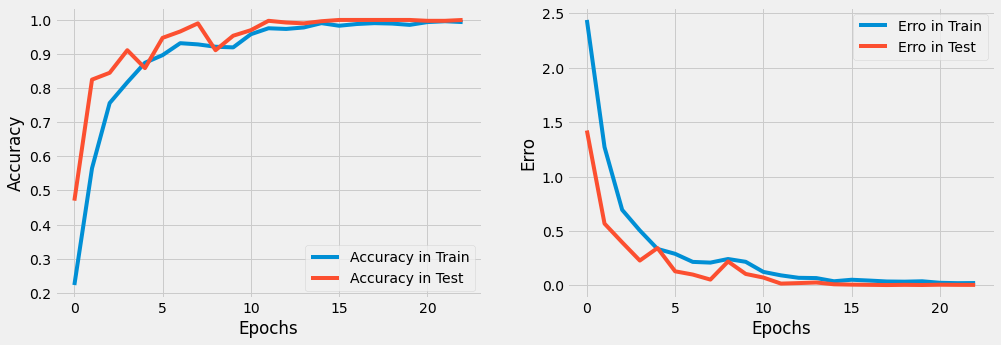

In [44]:


plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(hist.history['accuracy'])
axes[0].plot(hist.history['val_accuracy'])
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Accuracy in Train','Accuracy in Test'])
axes[0].grid(True)

axes[1].plot(hist.history['loss'])
axes[1].plot(hist.history['val_loss'])
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Erro')
axes[1].legend(['Erro in Train','Erro in Test'])
axes[1].grid(True)

